In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\hp pc\Downloads\Real_Estate_Sales_2001-2022_GL.csv")

C:\Users\hp pc\AppData\Local\Temp\ipykernel_12348\3194711744.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\hp pc\Downloads\Real_Estate_Sales_2001-2022_GL.csv")


In [5]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN


In [7]:
# Replacing unknown town using addressing to get the correct town ....... DATA CLEANING
df['Town'] = df['Town'].replace({'***Unknown***':'East Hampton'})

In [9]:
df[df['Town']=='***Unknown***']  # Confirming that '***Unknown***' no longer exist in the data

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [13]:
# changing 'Date Recorded' column's data type from object to date
df['Date Recorded'] = pd.to_datetime(df['Date Recorded']) 

In [15]:
# DATA CLEANING; changing the column data types to the right data types
df[['Assessed Value', 'Sale Amount']] = df[['Assessed Value', 'Sale Amount']].astype(int)

In [17]:
# DATA WRANGLING; Extracting year from the date column for easier analysis 
df['Sales_year'] = df['Date Recorded'].dt.year
df['Sales_Month'] = df['Date Recorded'].dt.strftime('%b')

In [19]:
df['Sales_year'] = df['Sales_year'].astype('Int64')

In [21]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location', 'Sales_year', 'Sales_Month'],
      dtype='object')

In [23]:
# Reodering columns 
new_order = ['Serial Number', 'List Year', 'Sales_Month', 'Sales_year', 'Date Recorded', 'Town',
       'Address', 'Assessed Value', 'Sale Amount', 'Sales Ratio',
       'Property Type', 'Residential Type', 'Non Use Code', 'Assessor Remarks',
       'OPM remarks','Location']

In [25]:
# Assinging new order as the new data column order
df = df[new_order]
df.head()

,Serial Number,List Year,Sales_Month,Sales_year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,Jan,2023,2023-01-30,Andover,618 ROUTE 6,139020,232000,0.5992,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,Sep,2021,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,Oct,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,Jul,2022,2022-07-05,Avon,53 COTSWOLD WAY,329730,805000,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,Mar,2021,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,NaN,NaN,NaN,NaN


In [33]:
#property count in each town
df1 = df.groupby('Town').size().reset_index(name = 'property_count')
df1

,Town,property_count
0,Andover,932
1,Ansonia,5017
2,Ashford,1467
3,Avon,7866
4,Barkhamsted,1191
...,...,...
164,Windsor Locks,4700
165,Wolcott,5241
166,Woodbridge,2788
167,Woodbury,3780


In [24]:
#Average assessed value of properties per town
df2 = df.groupby('Town')['Assessed Value'].mean().reset_index(name = 'Avg_Assessed_value')
df2

,Town,Avg_Assessed_value
0,Andover,138761.826180
1,Ansonia,135601.825394
2,Ashford,126507.423313
3,Avon,299593.289728
4,Barkhamsted,140392.621327
...,...,...
164,Windsor Locks,169651.647234
165,Wolcott,152421.731158
166,Woodbridge,301654.414275
167,Woodbury,201519.030688


In [25]:
df2['Avg_Assessed_value'] = df2['Avg_Assessed_value'].astype(int)  #change of datatype

In [26]:
df2.sort_values(by = 'Avg_Assessed_value', ascending = False)

,Town,Avg_Assessed_value
56,Greenwich,2523479
89,New Canaan,1118132
34,Darien,977637
157,Westport,881051
156,Weston,606372
...,...,...
23,Chaplin,108748
45,Eastford,107629
142,Torrington,107369
135,Sterling,104316


In [71]:
#What is the total sale amount for properties sold in a specific year?
df3 = df.groupby('Sales_year')['Sale Amount'].sum().reset_index(name = 'Total_sales_per_year')

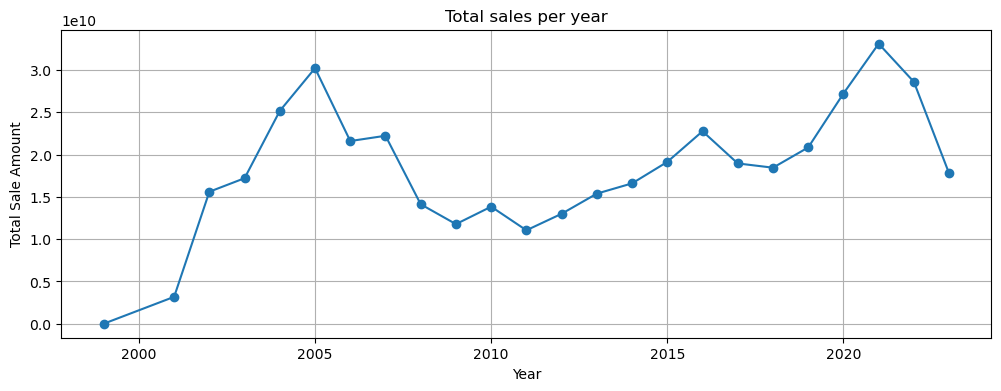

In [30]:
plt.figure(figsize=(12,4))
plt.plot(df3['Sales_year'], df3['Total_sales_per_year'], marker = 'o')
plt.title('Total sales per year')
plt.xlabel('Year')
plt.ylabel('Total Sale Amount')
plt.grid()
plt.show()

In [39]:
#NUMNERS OF PROPERTIES SOLD EACH YEAR
dff3 = df['Sales_year'].value_counts().sort_index().reset_index(name='value_count')

In [53]:
#What trends can be observed in sales amounts over the years?
sale_trend = df.groupby('Sales_year')['Sale Amount'].mean().reset_index()

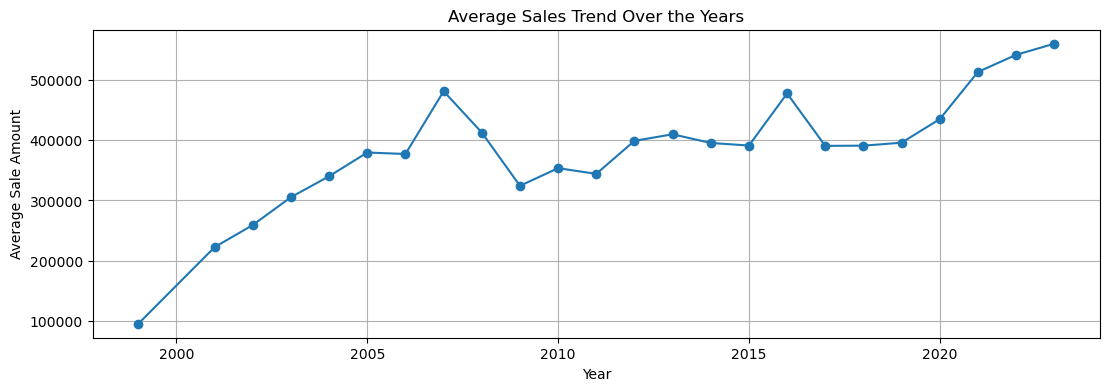

In [55]:
plt.figure(figsize= (13,4))
plt.plot(sale_trend['Sales_year'], sale_trend['Sale Amount'], marker = 'o')
plt.title('Average Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Sale Amount')
plt.grid()

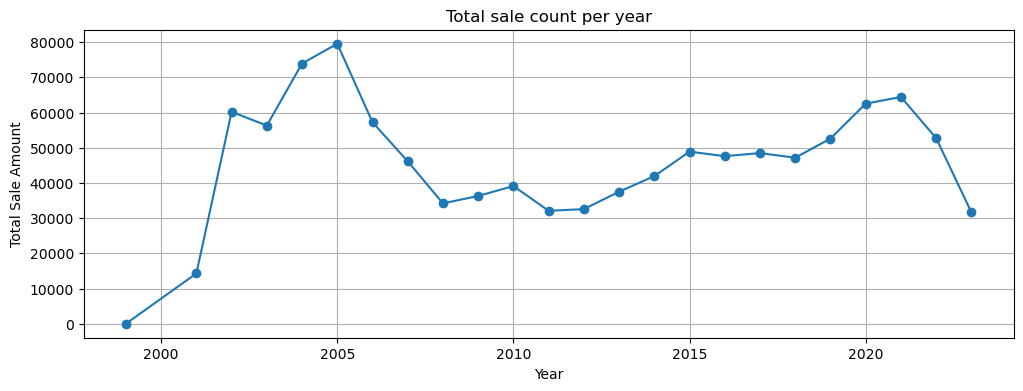

In [43]:
plt.figure(figsize=(12,4))
plt.plot(dff3['Sales_year'], dff3['value_count'], marker = 'o')
plt.title('Total sale count per year')
plt.xlabel('Year')
plt.ylabel('Total Sale Amount')
plt.grid()
plt.show()

In [34]:
#How does the average sales ratio vary by residential type?
df4 = df.groupby('Residential Type')['Sales Ratio'].mean().reset_index(name = 'RT_average_sale')   #WHERE 'RT' IS 'Residential Type'
df4

,Residential Type,RT_average_sale
0,Condo,0.840411
1,Four Family,1.210917
2,Single Family,6.549208
3,Three Family,1.220330
4,Two Family,1.066858


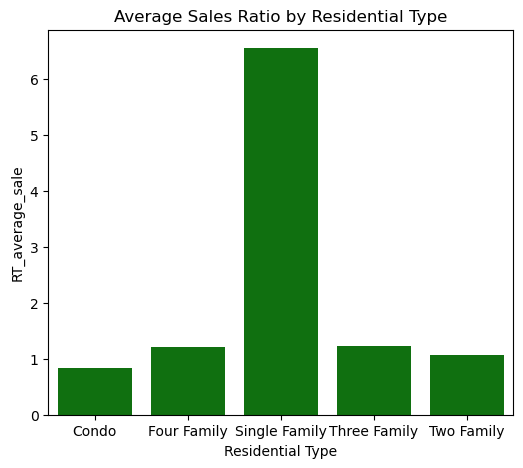

In [35]:
plt.figure(figsize= (6,5))
sns.barplot(x = 'Residential Type', y = 'RT_average_sale', data = df4, color = 'green')
plt.title('Average Sales Ratio by Residential Type')
plt.show()


In [65]:
#What is the relationship between assessed value and sale amount?
correlation = df['Assessed Value'].corr(df['Sale Amount'])
print(f"correlation between Assessed Values and Sale Amount: {correlation}")

correlation between Assessed Values and Sale Amount: 0.23083856760412516


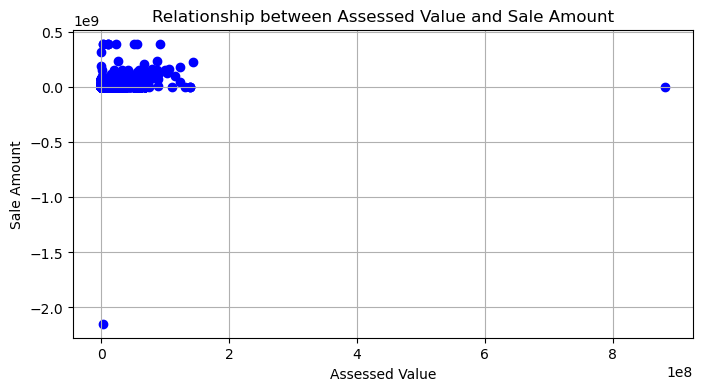

In [69]:
plt.figure(figsize = (8,4))
plt.scatter(df['Assessed Value'],
df['Sale Amount'], color='blue')
plt.title('Relationship between Assessed Value and Sale Amount')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.grid(True)
plt.show()

In [40]:
dff3 = df.groupby('Property Type')['Sale Amount'].sum().reset_index()     # Total sales per property types
dff3 = dff3.sort_values(by = 'Sale Amount').reset_index(drop = True)

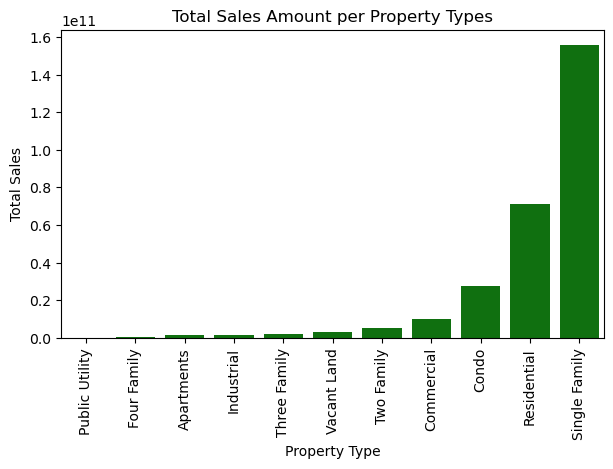

In [41]:
plt.figure(figsize = (7,4))
sns.barplot(x ='Property Type', y = 'Sale Amount', data = dff3, color = 'green')
plt.xticks(rotation = 90)
plt.xlabel('Property Type')
plt.ylabel('Total Sales')
plt.title('Total Sales Amount per Property Types')
plt.show()

In [47]:
dff4 = df.groupby('Town')['Sale Amount'].sum().reset_index()
dff4['Sale Amount']= dff4['Sale Amount'].abs()                # The abs() was used to remove all negative values coverting them to positive numbers
dff4.sort_values(by = 'Sale Amount', ascending = False).head(10).reset_index(drop = True)

,Town,Sale Amount
0,Greenwich,38665140309
1,Stamford,33092486938
2,Norwalk,16772637466
3,Westport,15336765873
4,Fairfield,13255773454
5,Darien,11670422931
6,New Canaan,10941894536
7,Danbury,8870835324
8,West Hartford,8265550808
9,Bridgeport,8028407582


In [49]:
merge1 = pd.merge(df1,dff4, how = 'inner', on = 'Town')

In [51]:
merge1.sort_values(by = 'Sale Amount', ascending = False)

,Town,property_count,Sale Amount
56,Greenwich,18341,38665140309
134,Stamford,36629,33092486938
102,Norwalk,26939,16772637466
157,Westport,10356,15336765873
50,Fairfield,17933,13255773454
...,...,...,...
62,Hampton,676,131088192
23,Chaplin,679,117312910
64,Hartland,512,105087019
122,Scotland,485,91528177


In [59]:
#How have assessed values changed over the years?
assessed_value_trends = df.groupby('Sales_year')['Assessed Value'].mean().reset_index()
assessed_value_trends

,Sales_year,Assessed Value
0,1999,46690.000000
1,2001,135491.729060
2,2002,149383.325128
3,2003,179519.487899
4,2004,195650.601883
5,2005,209550.697434
6,2006,220200.795266
7,2007,347280.946942
8,2008,325780.336921
9,2009,294441.470514


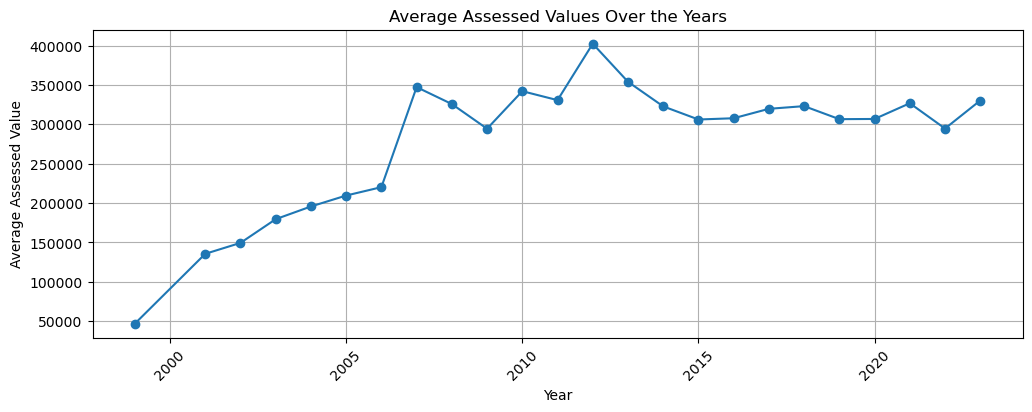

In [63]:
# Plotting the trends
plt.figure(figsize=(12, 4))
plt.plot(assessed_value_trends['Sales_year'], assessed_value_trends['Assessed Value'], marker='o')
plt.title('Average Assessed Values Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Assessed Value')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [57]:
df7 = df.groupby('Sales_Month').size().reset_index(name = 'No of monthly_sales')     # total sales made and count of house sold within each months

In [58]:
df8 = df.groupby('Sales_Month').agg(
    avg_sale_amount=('Sale Amount', 'mean'),
    No_of_monthly_sales=('Sale Amount', 'size')
).reset_index()
df8

,Sales_Month,avg_sale_amount,No_of_monthly_sales
0,Apr,385369.823754,83633
1,Aug,397961.241495,111526
2,Dec,463490.670170,91520
3,Feb,368347.141927,60820
4,Jan,415312.017871,70003
5,Jul,423733.222127,111756
6,Jun,419237.067891,113107
7,Mar,371468.928743,79571
8,May,384387.816387,96420
9,Nov,376057.853373,87385


In [59]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',           # Define the cotegory
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


df8['Sales_Month'] = pd.Categorical(df8['Sales_Month'], categories=month_order, ordered=True)
df8 = df8.sort_values(by = 'Sales_Month')
df8

,Sales_Month,avg_sale_amount,No_of_monthly_sales
4,Jan,415312.017871,70003
3,Feb,368347.141927,60820
7,Mar,371468.928743,79571
0,Apr,385369.823754,83633
8,May,384387.816387,96420
6,Jun,419237.067891,113107
5,Jul,423733.222127,111756
1,Aug,397961.241495,111526
11,Sep,386530.503336,94867
10,Oct,374207.480999,97019


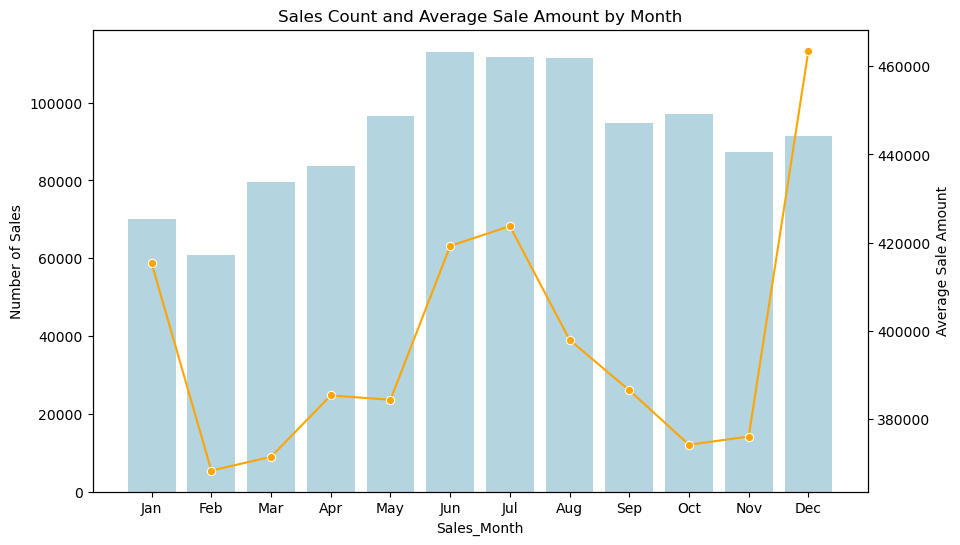

In [60]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the count as bars
sns.barplot(x='Sales_Month', y='No_of_monthly_sales', data=df8, color='lightblue', ax=ax1)
ax1.set_ylabel('Number of Sales')

# Create another y-axis for the mean sale amount
ax2 = ax1.twinx()
sns.lineplot(x='Sales_Month', y='avg_sale_amount', data=df8, marker='o', ax=ax2, color='orange')
ax2.set_ylabel('Average Sale Amount')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.title('Sales Count and Average Sale Amount by Month')
plt.show()
